In [1]:
import pandas as pd
import numpy as np
from os import listdir
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict

In [2]:
def csv_df(mypath, columns):
    mean = pd.read_csv(mypath + '2024-02-04.csv')
    mean['mean'] = mean[columns].mean(axis=1)
    mean.sort_values(by=['mean'], inplace=True, ascending=False)
    mean = mean[['Unnamed: 0', 'mean']].rename(columns={'mean': '2024-02-04'})
        
    for f in os.listdir(mypath)[1:]:
        meanf = pd.read_csv(mypath + f)
        meanf['mean'] = meanf[columns].mean(axis=1)
        meanf = meanf[['Unnamed: 0', 'mean']].rename(columns={'mean': f[:-4]})
        mean = pd.merge(mean, meanf, how='left', on='Unnamed: 0')
    
    mean = mean.T
    mean = mean.rename(columns=mean.loc['Unnamed: 0'])
    mean.drop('Unnamed: 0', axis=0, inplace=True)
    mean.sort_index(inplace=True)
    return mean

In [3]:
def derivative(window):
    colmns = mean1.columns

    langs1 = mean1.copy()
    langs2 = mean1.copy()

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels_val = OrderedDict()

    for c in colmns:
        langs1[c] = langs1[c].rolling(window=window).mean()
        langs2[c] = langs2[c].rolling(window=window).mean()
        langs2[c] = langs2[c].shift(window)
        labels_val[c] = (langs1[c] - langs2[c])[-1]

    labels = [k for k, v in sorted(labels_val.items(), key=lambda item: item[1], reverse=True)]

    for i, l in enumerate(labels):   
        if i < 10:
            ax.plot(langs1[l] - langs2[l])
        else:
            ax.plot(langs1[l] - langs2[l], linestyle='--')

    ax.legend(labels, loc='upper left')
    ax.axhline(y=0, color='k')
    plt.xticks('')

In [4]:
#['noExperience', 'between1And3', 'between3And6','moreThan6']

In [5]:
mean1 = csv_df('../salaries/langs/', ['noExperience', 'between1And3', 'between3And6','moreThan6']).copy()
colmns = mean1.columns

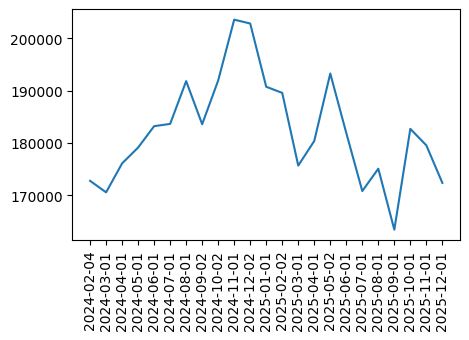

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)
plt.plot(mean1.mean(axis=1))
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [7]:
mean_begin = mean1.iloc[:3].mean()
mean_end = mean1.iloc[-3:].mean()
change1 = ((mean_end - mean_begin)*100/mean_begin).sort_values(ascending=False)

mean2 = csv_df('../salaries/langs/', ['noExperience', 'between1And3'])
mean_begin2 = mean2.iloc[:3].mean()
mean_end2 = mean2.iloc[-3:].mean()
change2 = (mean_end2 - mean_begin2)*100/mean_begin2

mean3 = csv_df('../salaries/langs/', ['between3And6','moreThan6'])
mean_begin3 = mean3.iloc[:3].mean()
mean_end3 = mean3.iloc[-3:].mean()
change3 = (mean_end3 - mean_begin3)*100/mean_begin3

df = pd.DataFrame({"all": change1})
df = pd.merge(df, change3.rename(">3"), left_index=True, right_index=True)
df = pd.merge(df, change2.rename("<3"), left_index=True, right_index=True)

for i in df.columns:
    df[i] = df[i].astype(float)

df_change = pd.DataFrame({"change": change1}).rank()
df_change = pd.merge(df_change, mean1.mean().rank(ascending=True).rename("mean"), left_index=True, right_index=True)
df_change["sum_rank"] = df_change["change"] + df_change["mean"]
df_change = df_change.sort_values(by="sum_rank", ascending=False)
df_change["sum_rank_r"] = df_change["change"] + (df_change.count().max() - df_change["mean"])
df_change_r = df_change.sort_values(by="sum_rank_r", ascending=False)

In [8]:
# df_change["sum_rank_all"] = df_change["sum_rank"] + df_change["sum_rank_r"]
# df_change = df_change.sort_values(by="sum_rank_all", ascending=False)

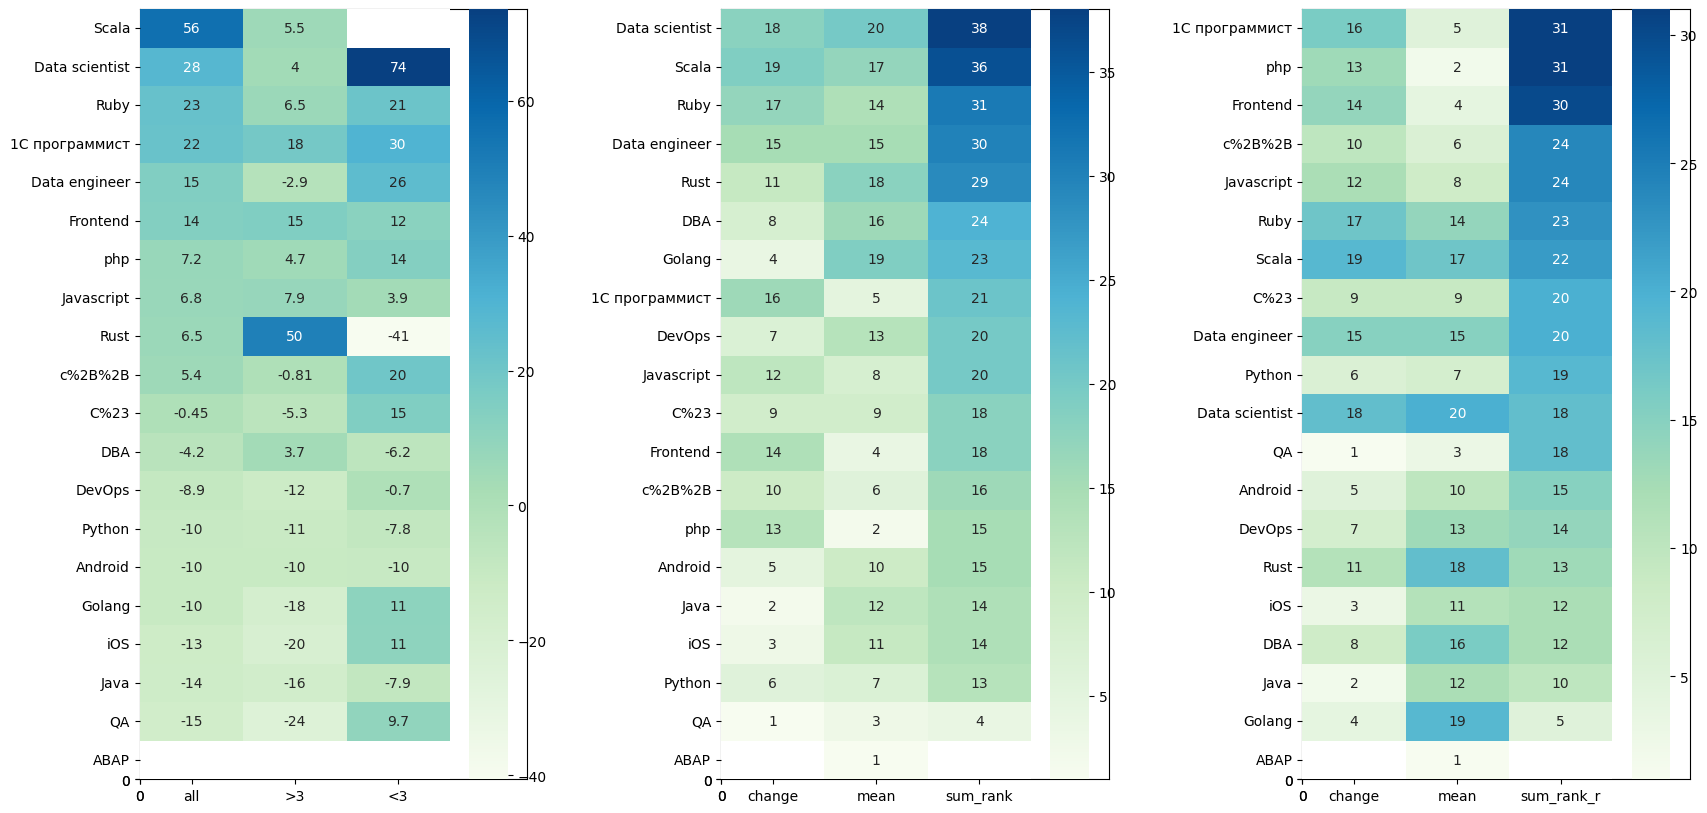

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20, 10)
ax0 = plt.subplot2grid((1, 3), (0, 0))
ax1 = plt.subplot2grid((1, 3), (0, 1))
ax2 = plt.subplot2grid((1, 3), (0, 2))
fig.subplots_adjust(wspace=0.5)
for ax in fig.get_axes():
    ax.set_yticks([0, 0])
    ax.set_xticks([0, 0])

ax0 = sns.heatmap(df,cmap='GnBu',annot=True, ax=ax0)
ax1 = sns.heatmap(df_change[['change', 'mean', 'sum_rank']],cmap='GnBu',annot=True, ax=ax1)
ax1 = sns.heatmap(df_change_r[['change', 'mean', 'sum_rank_r']],cmap='GnBu',annot=True, ax=ax2)
plt.show()

C:\Users\ksn\AppData\Local\Temp\ipykernel_9308\3997895206.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


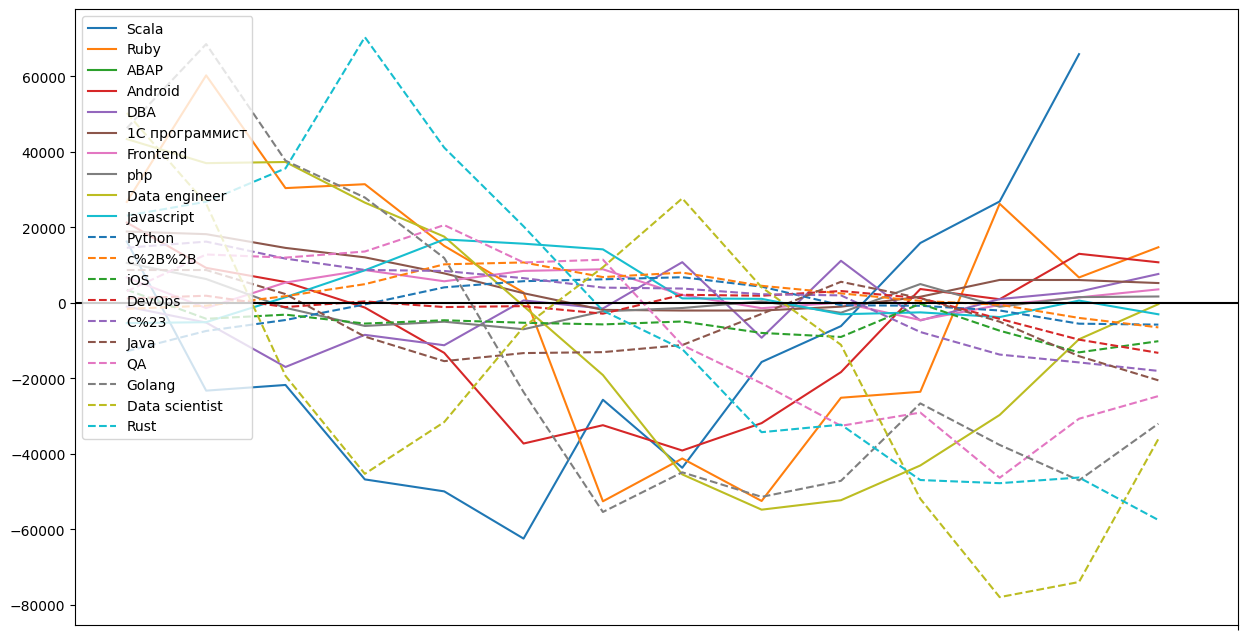

In [10]:
derivative(5)

In [11]:
mean1 = csv_df('../salaries/profs/', ['noExperience', 'between1And3', 'between3And6','moreThan6']).copy()
colmns = mean1.columns

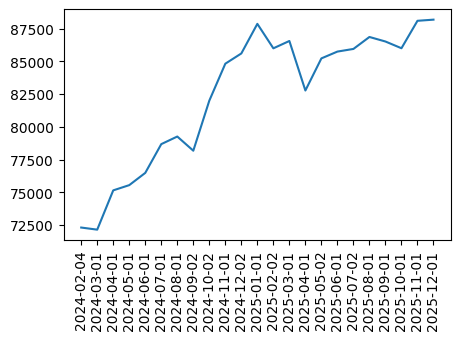

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 3)
plt.plot(mean1.mean(axis=1))
ax.xaxis.set_tick_params(rotation=90)
plt.show()

In [13]:
mean_begin = mean1.iloc[:3].mean()
mean_end = mean1.iloc[-3:].mean()
change1 = ((mean_end - mean_begin)*100/mean_begin).sort_values(ascending=False)

mean2 = csv_df('../salaries/profs/', ['noExperience', 'between1And3'])
mean_begin2 = mean2.iloc[:3].mean()
mean_end2 = mean2.iloc[-3:].mean()
change2 = (mean_end2 - mean_begin2)*100/mean_begin2

mean3 = csv_df('../salaries/profs/', ['between3And6','moreThan6'])
mean_begin3 = mean3.iloc[:3].mean()
mean_end3 = mean3.iloc[-3:].mean()
change3 = (mean_end3 - mean_begin3)*100/mean_begin3

df = pd.DataFrame({"all": change1})
df = pd.merge(df, change3.rename(">3"), left_index=True, right_index=True)
df = pd.merge(df, change2.rename("<3"), left_index=True, right_index=True)

for i in df.columns:
    df[i] = df[i].astype(float)

df_change = pd.DataFrame({"change": change1}).rank()
df_change = pd.merge(df_change, mean1.mean().rank(ascending=True).rename("mean"), left_index=True, right_index=True)
df_change["sum_rank"] = df_change["change"] + df_change["mean"]
df_change = df_change.sort_values(by="sum_rank", ascending=False)
df_change["sum_rank_r"] = df_change["change"] + (df_change.count().max() - df_change["mean"])
df_change_r = df_change.sort_values(by="sum_rank_r", ascending=False)

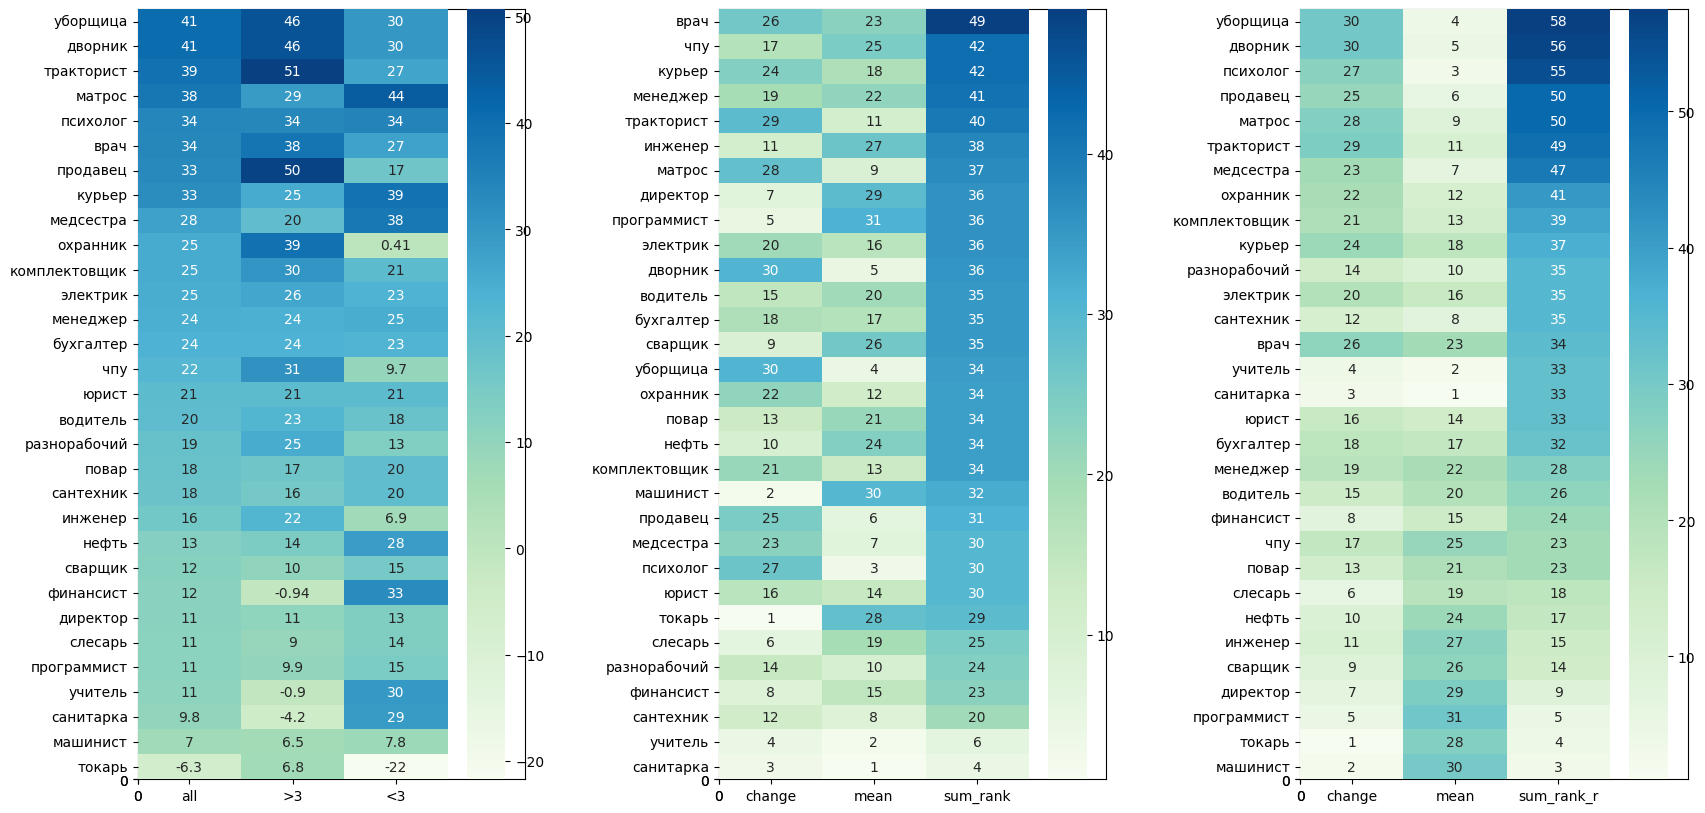

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20, 10)
ax0 = plt.subplot2grid((1, 3), (0, 0))
ax1 = plt.subplot2grid((1, 3), (0, 1))
ax2 = plt.subplot2grid((1, 3), (0, 2))
fig.subplots_adjust(wspace=0.5)
for ax in fig.get_axes():
    ax.set_yticks([0, 0])
    ax.set_xticks([0, 0])

ax0 = sns.heatmap(df,cmap='GnBu',annot=True, ax=ax0)
ax1 = sns.heatmap(df_change[['change', 'mean', 'sum_rank']],cmap='GnBu',annot=True, ax=ax1)
ax1 = sns.heatmap(df_change_r[['change', 'mean', 'sum_rank_r']],cmap='GnBu',annot=True, ax=ax2)
plt.show()

C:\Users\ksn\AppData\Local\Temp\ipykernel_9308\3997895206.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


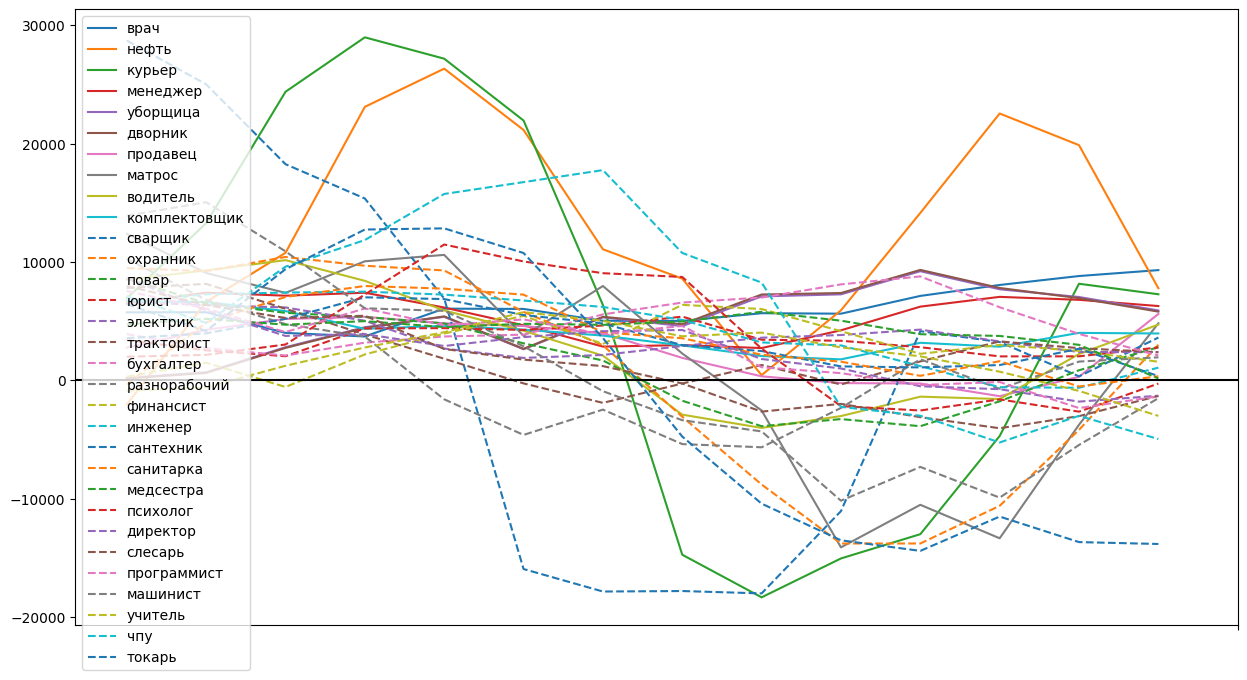

In [15]:
derivative(5)